<p style="font-size:300%;font-family:Source Sans Pro;text-align:center;line-height:50px;">Final Project<br>Spotify songs of Rolling Stones</p>

<table style="width:100%;font-family:'Roboto'; font-size:120%">
  <tr>
    <th colspan="3" style="text-align: center; vertical-align: middle;">
      MEMBERS & TASKS  
    </th>
  </tr>
  <tr>
    <th style="text-size:150%; text-align: center; vertical-align: middle;">ID</th>
    <th style="text-align: center; vertical-align: middle;">NAME</th>
    <th style="text-align: center; vertical-align: middle;">TASK</th>
  </tr>
  <tr>
    <td style="text-align: left; vertical-align: middle;">20127597</td>
    <td style="text-align: left; vertical-align: middle;">Bùi Tấn Phương</td>
  </tr>
  <tr>
    <td style="text-align: left; vertical-align: middle;">20127525</td>
    <td style="text-align: left; vertical-align: middle;">Trần Quốc Trung</td>
  </tr>
</table>

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 1. Data collection:

**Subject:** Rolling Stones Spotify Dataset  
**Source:** [Rolling Stones Spotify Dataset](www.kaggle.com/datasets/jarredpriester/rolling-stones-spotify-dataset?select=rolling_stones_spotify.csv)  
**Author's consent & License:** This dataset was uploaded onto Kaggle by [Jarred Priester](www.kaggle.com/jarredpriester). We can not find dataset's license although author mention it in data description.  
**Author data collection method:** from Spotify's API on the Rolling Stones.  

# 2. Exploring data:

In [2]:
df = pd.read_csv('rolling_stones_spotify.csv')
df = df.iloc[:, 1:]
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


## Number of rows and columns?

In [3]:
n_rows, n_cols = df.shape
print(f'Dataset has {n_rows} rows and {n_cols} columns!')

Dataset has 1610 rows and 17 columns!


## Are there any duplicates? 

In [4]:
any(df.duplicated())

False

## Meaning of each columns:

- `name` - the name of the song
- `album` - the name of the album
- `release_date` - the day month and year the album was released
- `track number` - the order the song appears on the album
- `id` - the Spotify id for the song
- `uri` - the Spotify uri for the song
- `acousticness` - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- `danceability` - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- `energy` - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- `instrumentalness` - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- `liveness` - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- `loudness` - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- `speechiness` - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- `tempo` - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- `valence` - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- `popularity` - the popularity of the song from 0 to 100
- `duration_ms` - The duration of the track in milliseconds.

## Data type

In [5]:
pd.DataFrame(pd.concat([df.dtypes, df.isnull().sum()], axis=1)).rename(columns={0:'type', 1:'null values'})

,type,null values
name,object,0
album,object,0
release_date,object,0
track_number,int64,0
id,object,0
uri,object,0
acousticness,float64,0
danceability,float64,0
energy,float64,0
instrumentalness,float64,0


Almost everything looks OK, but we should change Dtype of release_date to datetime.

In [6]:
df.release_date = pd.to_datetime(df.release_date, format='%Y/%m/%d')
pd.DataFrame(pd.concat([df.dtypes, df.isnull().sum()], axis=1)).rename(columns={0:'type', 1:'null values'})

,type,null values
name,object,0
album,object,0
release_date,datetime64[ns],0
track_number,int64,0
id,object,0
uri,object,0
acousticness,float64,0
danceability,float64,0
energy,float64,0
instrumentalness,float64,0


## Distribution

### Numeric

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
track_number,1610.0,8.613665,6.560220,1.000000,4.000000,7.00000,11.00000,47.000
acousticness,1610.0,0.250475,0.227397,0.000009,0.058350,0.18300,0.40375,0.994
danceability,1610.0,0.468860,0.141775,0.104000,0.362250,0.45800,0.57800,0.887
energy,1610.0,0.792352,0.179886,0.141000,0.674000,0.84850,0.94500,0.999
instrumentalness,1610.0,0.164170,0.276249,0.000000,0.000219,0.01375,0.17900,0.996
liveness,1610.0,0.491730,0.349100,0.021900,0.153000,0.37950,0.89375,0.998
loudness,1610.0,-6.971615,2.994003,-24.408000,-8.982500,-6.52300,-4.60875,-1.014
speechiness,1610.0,0.069512,0.051631,0.023200,0.036500,0.05120,0.08660,0.624
tempo,1610.0,126.082033,29.233483,46.525000,107.390750,124.40450,142.35575,216.304
valence,1610.0,0.582165,0.231253,0.000000,0.404250,0.58300,0.77800,0.974


From above dataframe, we can relized there is not any missing values and nothing wrong here

### Categorical

In [8]:
categorical_df = df.select_dtypes(include='O')
categorical_df.describe(include='O').T

,count,unique,top,freq
name,1610,954,Honky Tonk Women - Live,16
album,1610,90,Voodoo Lounge Uncut (Live),56
id,1610,1610,6efcLdcSYvjXJKYKiDdlyS,1
uri,1610,1610,spotify:track:3v9IBMSqQqdG8XYGOHIXkR,1


Similarly to numeric, we can easily relize there is not any missing value and everything is normal

In [9]:
categorical_diff_val = categorical_df.apply(lambda x : pd.unique(x))
categorical_num_diff_val = categorical_df.nunique()

pd.DataFrame([categorical_num_diff_val, categorical_diff_val], index=['number of different values', 'different values']).T

,number of different values,different values
name,954,"[Concert Intro Music - Live, Street Fighting M..."
album,90,"[Licked Live In NYC, Live At The El Mocambo, T..."
id,1610,"[2IEkywLJ4ykbhi1yRQvmsT, 6GVgVJBKkGJoRfarYRvGT..."
uri,1610,"[spotify:track:2IEkywLJ4ykbhi1yRQvmsT, spotify..."


$ chỗ này khá thừa

Something looklike abnormal in '*name*' column

In [10]:
index = df['name'].str.contains('-')
df['name'][index].value_counts().head(10)

Honky Tonk Women - Live                 16
Brown Sugar - Live                      16
Tumbling Dice - Live                    14
Sympathy For The Devil - Live           13
Start Me Up - Live                      12
Jumpin’ Jack Flash - Live               11
Miss You - Live                         11
Street Fighting Man - Live               9
Midnight Rambler - Live                  9
(I Can't Get No) Satisfaction - Live     9
Name: name, dtype: int64

The name of song before dash, and after that is extra information of song.

In [11]:
# df['extra_infor'] = df['name'].str.extract(r'-(.+)')

In [12]:
df['name'] = df['name'].str.extract(r'(.*?)?(-|$)').iloc[:,:1]

In [13]:
df['name']

0             Concert Intro Music 
1             Street Fighting Man 
2                     Start Me Up 
3            If You Can't Rock Me 
4                      Don’t Stop 
                   ...            
1605                         Carol
1606                       Tell Me
1607           Can I Get A Witness
1608    You Can Make It If You Try
1609               Walking The Dog
Name: name, Length: 1610, dtype: object

---

# Propose meaningfull question and answer them:
- How do song properties change overtime?
- Is this a good time to create music?
- What is the most successful time of Rolling-Stones?
- How many songs in the albums is good?
- How does an album attract listeners?
  
- Top music through each year ( objective ?)
- Potential trends of Rolling Stones?
    * ***objective***: Identify key factors that influence a song's popularity, find potential trends in popular music that will provide a guideline for **Rolling Stones**


### Preprocessing

Insert '*year*' column base on release_date

In [14]:
df['year'] = df.release_date.dt.year

## How do song properties change overtime?

In [15]:
df.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms', 'year'],
      dtype='object')

In [16]:
song_properties = df.loc[:, ['year', 'acousticness', 'danceability', 'energy', 'instrumentalness',
                            'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms']]

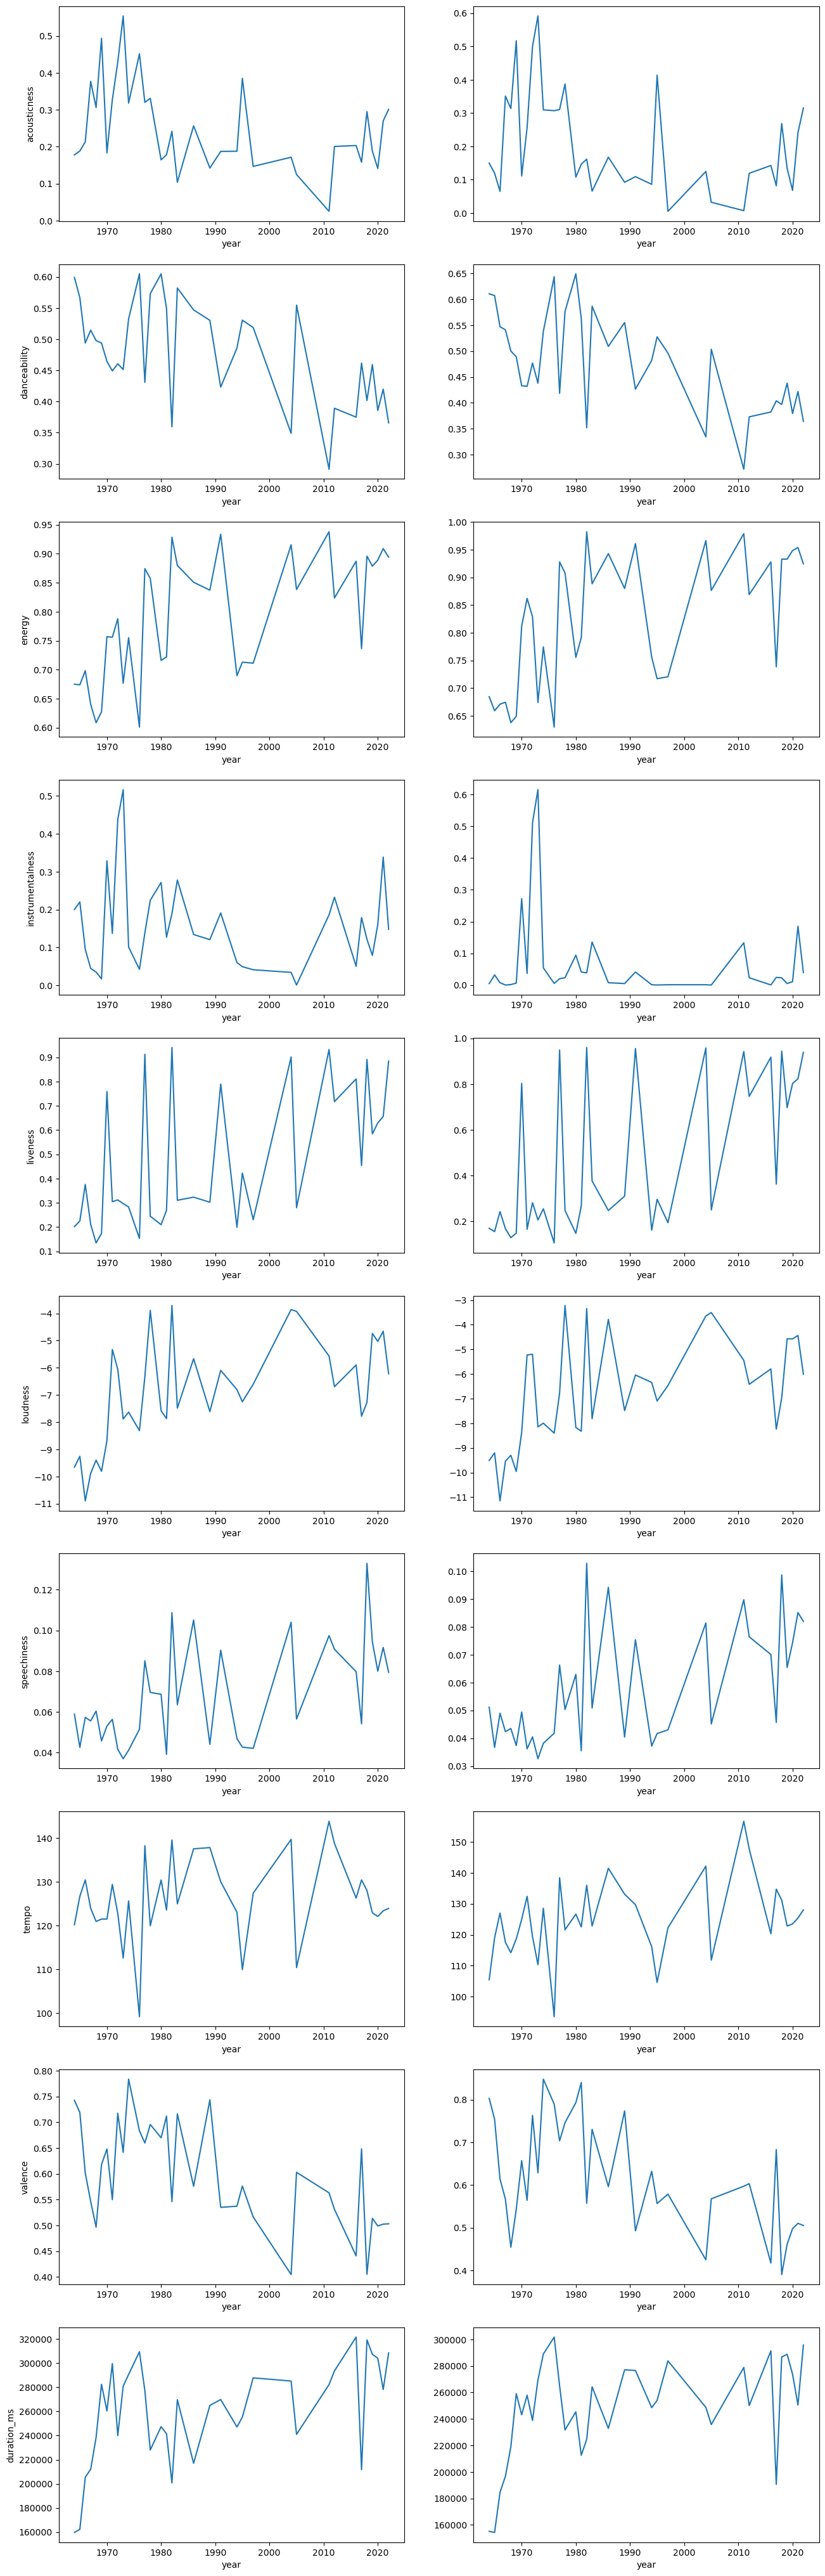

In [17]:
fig, axes = plt.subplots(10, 2, figsize=(15, 50))
properties = song_properties.columns[1:]
for p, ax in zip(song_properties.columns[1:], axes):
    meanline = song_properties.groupby('year', as_index=False)[p].mean()
    sns.lineplot(x=meanline.year, y=meanline[p], ci=None, ax=ax[0])  
    # sns.boxplot(x=song_properties.year, y=song_properties[p], showfliers=False, ax=ax[1])
    medianline = song_properties.groupby('year', as_index=False)[p].median()
    sns.lineplot(x=medianline.year, y=medianline[p], ci=None, ax=ax[1])
    ax[1].set_ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)
plt.show()

From above plots, we can relize that:
- Accoustic and intrusmental music are popular in 1970s, when electronics was not developed. Therefore, music was just created from intrusments. Moreover, Accoustic have a short popular durations in 1990s
- Dance music have had a long popular time from late 1970s but it decrease overtime.
- Energetic track popular overtime. This type have strong beat, attractive and make people feel positive.
- Livesong could be normal overtime, because almost song could use for living!
- speechiness popularity has increase overtime but it reach at most a little bit 1.2. However, there has been a huge leap in recent years marking the growth of variations such as e-books, podcasts.
- There is a surprise that audience like listenning less valence music than before. It is the result of fully using romanticism material to compose.
- Because of popularity and development of dance and envergy, loudness and tempo also increase over those time.
- Duration of a track have not changed too much overtime, the normal duration is more than 4 minutes a little bit.

$ nên bỏ vào chart nhiều line

## Is this a good time to produce musics?

In [18]:
music_20_to_22 = df.loc[(df.year >= 2020) & (df.year <= 2022)]

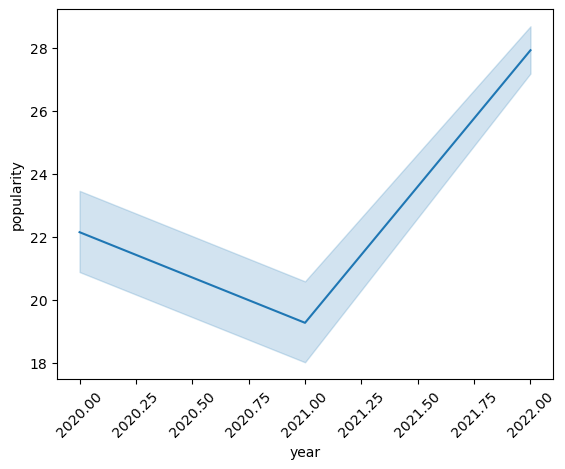

In [19]:
sns.lineplot(x=music_20_to_22.year, y=music_20_to_22.popularity)
plt.xticks(rotation=45)
plt.show()

music market increased in 2020-2021 period but has increased for this year **&rarr; This is the good time for release new songs!**

## Potential trends of Rolling Stones??

First i will get top 50 most successful songs with the most popularity.

In [22]:
top50_song = df.sort_values('popularity',ascending=False).head(50)
top50_song.describe().T[['min','max','mean']]

,min,max,mean
track_number,1.000000,17.000,5.140000
acousticness,0.000596,0.892,0.348376
danceability,0.320000,0.795,0.561700
energy,0.277000,0.972,0.735180
instrumentalness,0.000000,0.940,0.116168
liveness,0.039400,0.774,0.211122
loudness,-13.571000,-2.752,-6.638760
speechiness,0.025500,0.214,0.047660
tempo,67.848000,167.972,119.958840
valence,0.088900,0.973,0.642018


I will working with above dataset **top50_song** to find the potential trends. To find the attributes that contributes to virality, I started analysis with trying to plotting some features against popularity to find possible correlation between them. I am utilizing scatterplots in sheets since it will be easy to identify common trends in the dataset simply by viewing how the data points clump together.

- Danceability

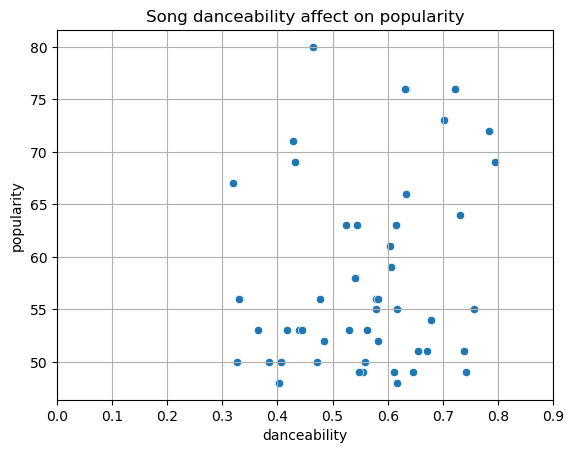

In [23]:
sns.scatterplot(x=top50_song['danceability'], y=top50_song.popularity).set_title('Song danceability affect on popularity')
plt.grid()
plt.xticks(np.arange(0,1,0.1))
plt.show()

***OBSERVATION***: Judging from songs ranging from 50-80 score in **0.4-0.7 danceability** seems to be a suitable range to estimate a popular song would fall into.

- Acousticness

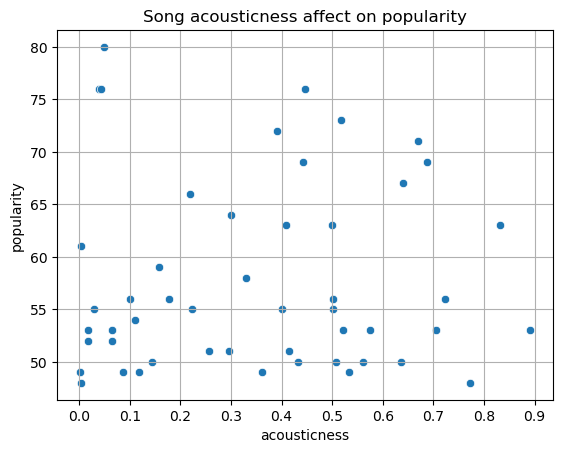

In [25]:
sns.scatterplot(x=top50_song['acousticness'], y=top50_song.popularity).set_title('Song acousticness affect on popularity')
plt.grid()
plt.xticks(np.arange(0,1,0.1))
plt.show()

***OBSERVATION***: The range of **acousticness** observed is so wide, and the data points are so scattered that it can be assumed that the loudness of the song has no association to its popularity.

- Energy

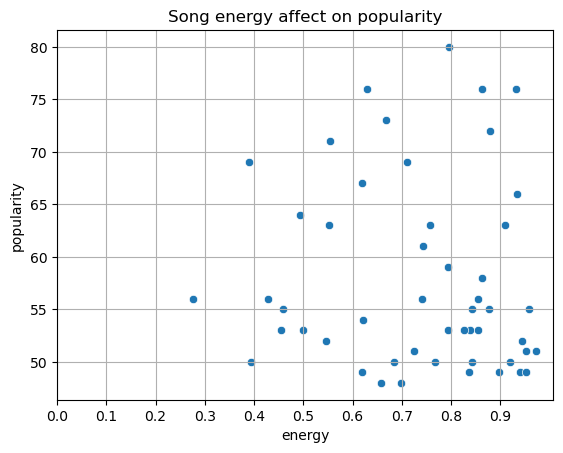

In [26]:
sns.scatterplot(x=top50_song['energy'], y=top50_song.popularity).set_title('Song energy affect on popularity')
plt.grid()
plt.xticks(np.arange(0,1,0.1))
plt.show()

***OBSERVATION***: **0.6-0.972 energy** is a suitable window to set the energy level.

- Instrumentalness

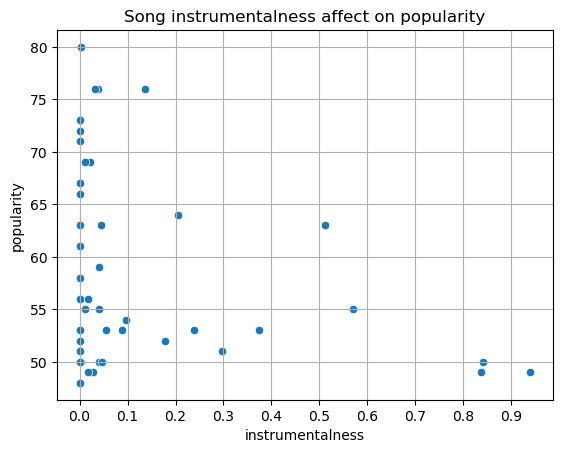

In [27]:
sns.scatterplot(x=top50_song['instrumentalness'], y=top50_song.popularity).set_title('Song instrumentalness affect on popularity')
plt.grid()
plt.xticks(np.arange(0,1,0.1))
plt.show()

***OBSERVATION***: Instrumentalness is tightly plotted around the **0-0.1** range, this can mean songs that does not contain much vocals are more popular.

- Loudness	

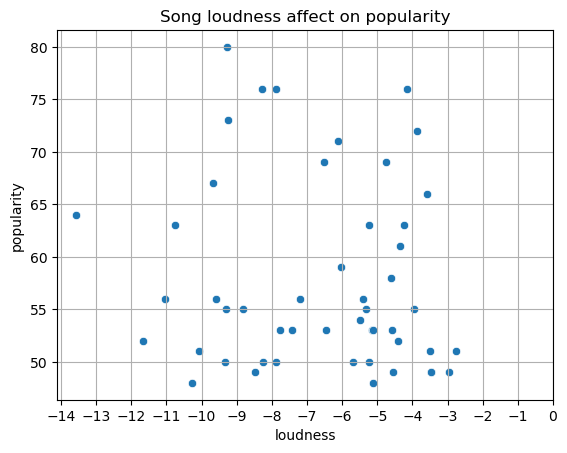

In [28]:
sns.scatterplot(x=top50_song['loudness'], y=top50_song.popularity).set_title('Song loudness affect on popularity')
plt.grid()
plt.xticks(np.arange(-14,1,1))
plt.show()

Loudness is very scattered

- Speechiness

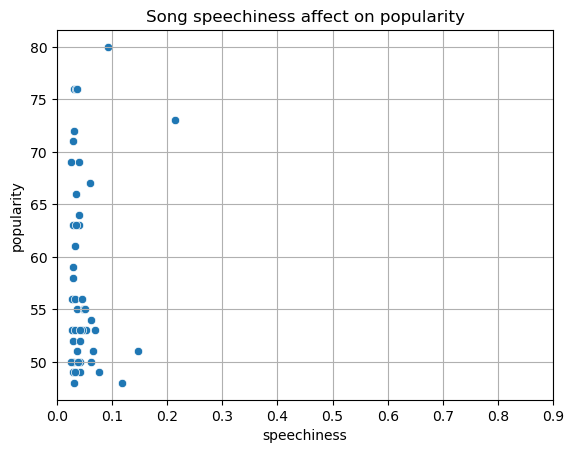

In [29]:
sns.scatterplot(x=top50_song['speechiness'], y=top50_song.popularity).set_title('Song speechiness affect on popularity')
plt.grid()
plt.xticks(np.arange(0,1,0.1))
plt.show()

Similar to instrumentalness, Speechiness is tightly plotted around the **0-0.1** range.

- Tempo

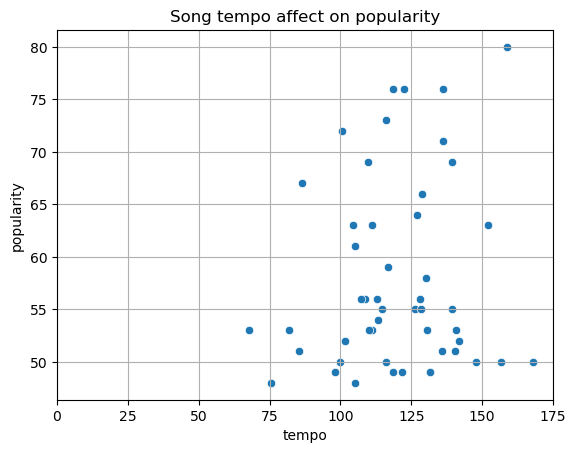

In [30]:
sns.scatterplot(x=top50_song['tempo'], y=top50_song.popularity).set_title('Song tempo affect on popularity')
plt.grid()
plt.xticks(np.arange(0,200,25))
plt.show()

Trend of songs staying in the **75-150 bpm** tempo window.

- Valence

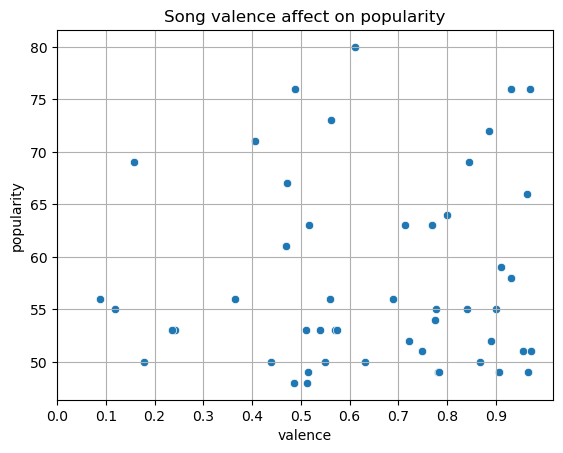

In [31]:
sns.scatterplot(x=top50_song['valence'], y=top50_song.popularity).set_title('Song valence affect on popularity')
plt.grid()
plt.xticks(np.arange(0,1,0.1))
plt.show()

**Valence** is very scattered, though it shows light group around the 0.5 - 1 area but it is over to be considered a deciding factor on virality.

#### Conclude

Here is the **viral template**:
- **Danceability**:  0.4-0.7
- **Energy**: 0.6-0.972
- **Instrumentalness**: 0.0-0.1
- **Speechiness**: 0.0-0.1
- **Tempo**: 75-100 bpm